---
# 神经元网络及其应用

  - 王君銘
  - 吴艳辉




# 引言
神经网络（neutral network）是重要的机器学习技术，也是深度学习（deep learning）的重要基础。神经网络因为其结构形似人脑中的神经元而命名。通常线性模型是我们常用的模型，但是有时候我们在对样本进行分类时，很难找用一条线性分类边界对样本进行分类。因此神经网络在分类问题中的效果很好,特别当神经网络在三层及以上时，能够很好地进行非线性可分。


#神经网络
神经网络模型是一个包含输入输出与计算功能的模型，由输入层、隐藏层、输出层构成。当只有输入层和输出层两层时被称为感知器（perceptron），当层数大于三时即可被称为深度学习（deep learning）。输入层的每个神经元代表了一个特征，输出层个数代表了分类标签的个数。隐藏层层数和隐藏神经元是由人工设定的。在层与层之间存在箭头连接，每个连接上都有权重，每个隐藏神经元/输出神经元的值，都是由上一层神经元经过加权求和非线性变换而得到的，
其中的非线性变换函数可以是：sigmoid、tanh、relu等函数。具体如下所示


![神经网络](./1.png)

神经元网络的训练算法就是优化神经网络的目标函数，从而进行参数学习，让目标权重值调整到最佳使得整个网络的预测效果最好。
假设输出层只有一个神经元，而网络有k层，则其目标函数为
$$J(\theta)=-\frac{1}{m}\left[\sum_{i=1}^{m} y^{(i)} \log \left(h_{\theta}\left(a^{(K-1)}\right)\right)+\left(1-y^{(i)}\right) \log \left(1-h_{\theta}\left(a^{(K-1)}\right)\right)\right]+\frac{\lambda}{2 m} \sum_{k=1}^{N_{k}} \sum_{i=1}^{N_{k}} \sum_{j=1}^{N_{k+1}}\left(\theta_{j i}^{(k)}\right)^{2}$$

# 神经网络优化算法
由于神经网络的最后一层输出和每层的神经元都有关系，因此神经网络的每一层与下一层之间都存在一个参数举着，我们需要通过优化算法求出每一层的参数矩阵，对于一个K层神经网络，一共需要求解K-1个参数矩阵，因此无法直接对目标函数进行梯度计算来求解参数矩阵。

对于神经网络的优化主要需要两步：前向传播（forward propapagation）和反向传播（back propagation）。前向传播就是从输入层到输出层计算每一层每一个神经元的值。反向传播就是根据前向传播计算出来的值来计算每一层参数的梯度，并从后往前进行参数的更新。

在训练神经网络时，最好去标准化所有的输入值，使其均值为0，标准差为1.同时为了避免过度拟合，一般情况下，需要对优化加一些惩罚项。加了惩罚项的后的损失模型如下：
$$E_{\mathrm{aug}}(w)=E_{i n}(w)+\lambda\|w\|^{2}$$

也可以通过限制隐藏层的节点数量来控制模型的复杂程度。在实践中，惩罚项是更加常用的方法。

# 神经网络的代码实现

本文给出以下实例，说明如何用神经网络模型解决多元离散选择问题，即用神经网络模型分析决策者i在面对（J+1）项可供选择方案时，如何进行选择的问题。

首先用make_moons函数，自动生成可以操作的数据集。


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
import sklearn.datasets 
import sklearn.linear_model 
import matplotlib 


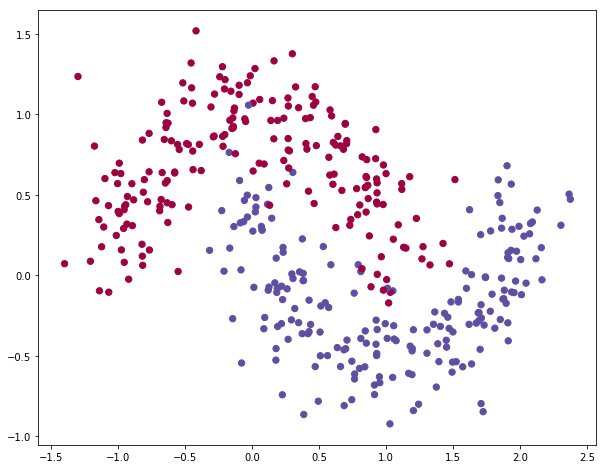

In [2]:
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0) 
 

np.random.seed(3) 
X, y = sklearn.datasets.make_moons(400, noise=0.20) 
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral) 


生成的数据集中有两种类型的数据，分别用红点和蓝点表示。我们将蓝点视为A类群体，将红点视为B类群体，并且将x轴和y轴视为区分A、B类群体的方式。

我们的目的是形成一个学习分类器，让它在x、y坐标系下预测正确的类别（A类或者B类）。从图中可以发现这些数据不能被线性分割，我们无法画出一条直线将这两种类型的数据分开，这意味着线性分类器（比如Logistic回归）将无法很好的拟合这些数据。

所以，我们可以选用神经网络模型，它可以较好的拟合这些数据，这也是神经网络模型的一个主要的优点。

接下来，为梯度下降定义一些变量和参数：

In [3]:
num_examples = len(X) # 训练集大小
nn_input_dim = 2 #输入层维度
nn_output_dim = 2 # 输出层维度
 
# 设定梯度参数
epsilon = 0.01 
reg_lambda = 0.01 
 

接着我们用函数来衡量模型给出的结果是否令人满意。

并且用函数帮助我们计算神经网络的输出；最后，用这个函数来训练神经网络，它利用反向传播导数来实现批量梯度下降。

In [4]:
def plot_decision_boundary(pred_func): 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
   
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 

In [5]:
# 计算损失函数
def calculate_loss(model): 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # 前向传播 
    z1 = X.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    # 计算损失值
    corect_logprobs = -np.log(probs[range(num_examples), y]) 
    data_loss = np.sum(corect_logprobs) 
    # 加限制项
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2))) 
    return 1./num_examples * data_loss 
 

def predict(model, x): 
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2'] 
    # Forward propagation 
    z1 = x.dot(W1) + b1 
    a1 = np.tanh(z1) 
    z2 = a1.dot(W2) + b2 
    exp_scores = np.exp(z2) 
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
    return np.argmax(probs, axis=1) 
 
def build_model(nn_hdim, num_passes=20000, print_loss=False): 
 
  
    np.random.seed(0) 
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim) 
    b1 = np.zeros((1, nn_hdim)) 
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim) 
    b2 = np.zeros((1, nn_output_dim)) 
 
   
    model = {} 
 
 
    for i in range(0, num_passes): 
 
        # 前向传播
        z1 = X.dot(W1) + b1 
        a1 = np.tanh(z1) 
        z2 = a1.dot(W2) + b2 
        exp_scores = np.exp(z2) 
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) 
 
        # 后向传播
        delta3 = probs 
        delta3[range(num_examples), y] -= 1 
        dW2 = (a1.T).dot(delta3) 
        db2 = np.sum(delta3, axis=0, keepdims=True) 
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2)) 
        dW1 = np.dot(X.T, delta2) 
        db1 = np.sum(delta2, axis=0) 
 
    
        dW2 += reg_lambda * W2 
        dW1 += reg_lambda * W1 
 
      
        W1 += -epsilon * dW1 
        b1 += -epsilon * db1 
        W2 += -epsilon * dW2 
        b2 += -epsilon * db2 
 
       
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2} 
 
     
        if print_loss and i % 1000 == 0: 
          print("Loss after iteration %i: %f" %(i, calculate_loss(model))) 
 
    return model 
 


Loss after iteration 0: 0.360605
Loss after iteration 1000: 0.072923
Loss after iteration 2000: 0.072151
Loss after iteration 3000: 0.071875
Loss after iteration 4000: 0.071735
Loss after iteration 5000: 0.071653
Loss after iteration 6000: 0.071600
Loss after iteration 7000: 0.071565
Loss after iteration 8000: 0.071541
Loss after iteration 9000: 0.071524
Loss after iteration 10000: 0.071512
Loss after iteration 11000: 0.071503
Loss after iteration 12000: 0.071496
Loss after iteration 13000: 0.071490
Loss after iteration 14000: 0.071486
Loss after iteration 15000: 0.071483
Loss after iteration 16000: 0.071480
Loss after iteration 17000: 0.071478
Loss after iteration 18000: 0.071476
Loss after iteration 19000: 0.071474


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

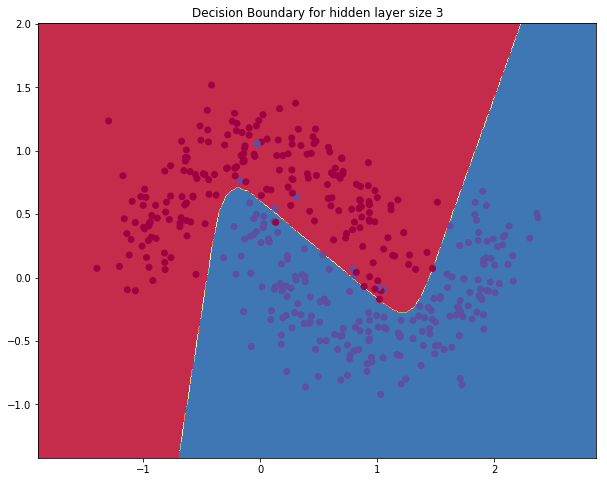

In [6]:

# 建立3个隐藏层的模型
model = build_model(3, print_loss=True) 
 
# 画出决策边界
plot_decision_boundary(lambda x: predict(model, x)) 
plt.title("Decision Boundary for hidden layer size 3") 
 

在上面的例子中，我们选择了有三个节点的隐藏层，现在我们改变隐藏层的大小，看看会如何影响最终的结果。

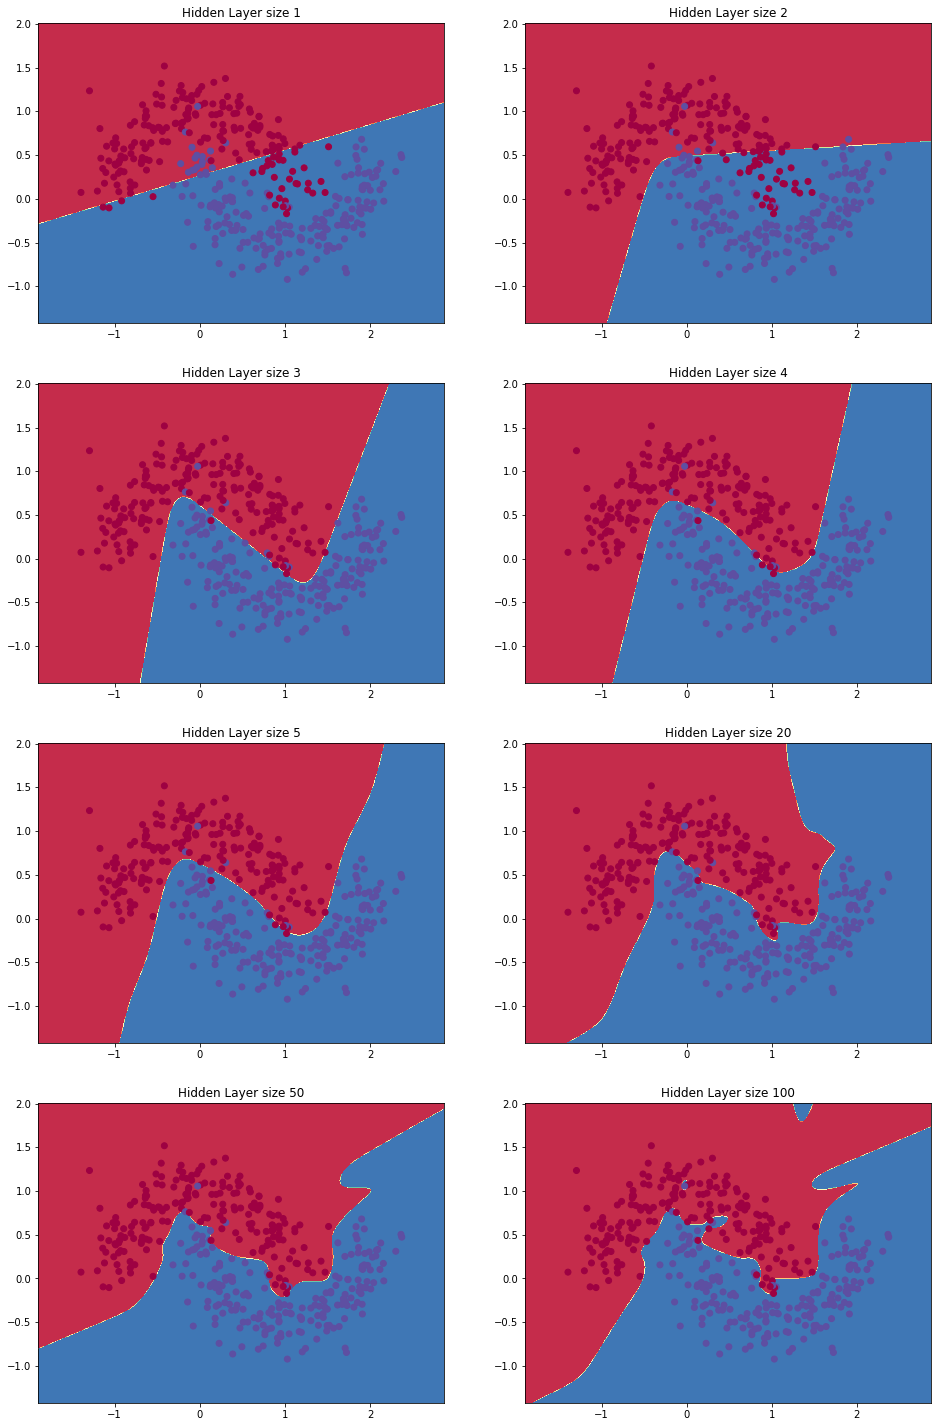

In [7]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50,100]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

从图中可以发现，适当低维度的隐藏层可以很好地捕获数据的大致边界，而过高维度的隐藏层则更易出现过度拟合。虽然过度拟合可以通过高强度的正则化进行抵销，不过选择最为合适的隐藏层就会更加“经济”的解决问题。

# 参考文献

[1]  [神经网络的理解与实现](https://www.cnblogs.com/lliuye/p/9183914.html)

[2]  [神经网络——最易懂最清晰的一篇文章](https://blog.csdn.net/illikang/article/details/82019945)

[3]  Neutral Network，maojiaming

[4]  [用Python从头开始实现一个神经网络](https://blog.csdn.net/young2415/article/details/81772068)
